# README

This delivery contains the implementation of the 7th task of the "Automatic Signal Detector" project of the Computer Vision course.

In this notebook we design and train a CNN model to classify hand sign letters. We will train the model with a custom dataset created in tasks 5ht and 6th which contains the letters "A", "B" and "C".

Please, change the dataset path in the "Synchronizing Drive section" for a successful run.

## Important notes:

1.   The cells that use the webcam run in a loop, one has to **stop manually the cell** and **re-run the notebook from the next cell** to run the rest of the notebook successfully.

# TASK 7 - MACHINE LEARNING AND COMPUTER VISION PROJECT

Author: Nicolás Arrieta Larraza

Date: 03/05/2021

## Initializing

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Synchronizing Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/UCA/ComputerVision/task_5/SignalDataset/32'

## Creating datasets

In this section we create the training and validation datasets out of the files in Drive. We choose to use 80% of the data for training and 20% for validation.

Firstly we define the image dimension and the batch size.



In [ ]:
img_height, img_width = 32, 32
batch_size=32

Then we define the datasets with the Tensor Flow API.



In [ ]:
# Training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 900 files belonging to 3 classes.
Using 720 files for training.


In [ ]:
# Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 900 files belonging to 3 classes.
Using 180 files for validation.


In [ ]:
# Checking if the classes where assigned correctly
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C']


We optimize the use of the Datasets through the "prefetch" transformation. The "Autotune" option is chosen to choose dynamically the number of batches consumed in each training step.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Showing resulting dataset content

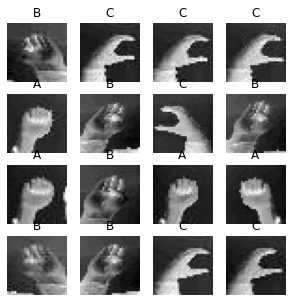

In [ ]:
plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8").squeeze(), cmap=plt.cm.binary)
    plt.title(class_names[labels[i]])
    plt.axis("off")
  break

## Creating CNN model

In [ ]:
# Model taken from prof. Mekhalfa example.

model = Sequential([
    # 32 convolutional filters of size 3 x 3, 'relu activation', padding = same (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1), padding='same'),
    # 2 X 2 max pooling layer (https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    # Dropout with probability 20%. Useful to avoid overfitting. (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    # Flatten the last image features before liking to a FFN (https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D)
    layers.GlobalAvgPool2D(),
    # A simple fully connected layer with a 'relu' activation
    layers.Dense(64, activation='relu'),
    # A simple fully connected output layer with no activation
    layers.Dense(3)
])


We choose **Adam** (it combines Adagrad and RMSProp) as optimizer since its proven efficient in image classification tasks and the **SparseCategoricalCrossentropy** loss function since the cross entropy loss function is also proven efficient and it is a multilabel task.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

## Training

In [ ]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
23/23 [==============================] - 207s 8s/step - loss: 8.0733 - accuracy: 0.3921 - val_loss: 1.1182 - val_accuracy: 0.2778
Epoch 2/5
23/23 [==============================] - 0s 6ms/step - loss: 0.9334 - accuracy: 0.5344 - val_loss: 0.4351 - val_accuracy: 1.0000
Epoch 3/5
23/23 [==============================] - 0s 5ms/step - loss: 0.3942 - accuracy: 0.8586 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 4/5
23/23 [==============================] - 0s 5ms/step - loss: 0.0283 - accuracy: 0.9963 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 5/5
23/23 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 5.9625e-04 - val_accuracy: 1.0000


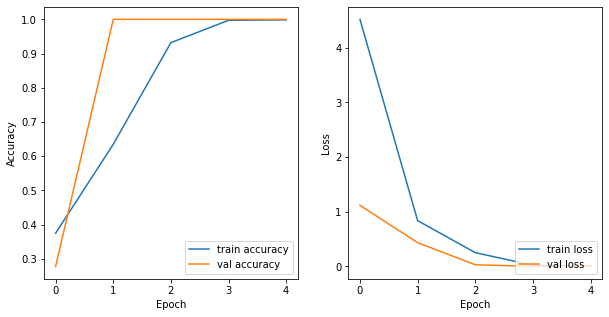

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

As we can observe from the training results the model seems to fit correctly for this task. It presents a final **training accuracy of 0.9985** and a **validation accuracy of 1.00** and the accuracy and loss functions converge in 4 epochs to these values.

The accuracy and loss values change in each training session since the weights are randomly initialized, however the results are very similar.

We will test the model with real time generated data in task 8.

Saving model to be used in task 8

In [ ]:
model.save('/content/drive/MyDrive/UCA/ComputerVision/task_7_and_8/custom_model.h5') 